<a href="https://colab.research.google.com/github/shruthimohan03/Loan_approval_kaggle/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import pandas as pd
data=pd.read_csv('/content/train.csv')
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [282]:
# prompt: check imbalance class in column 'loan_status'

loan_status_counts = data['loan_status'].value_counts()
print(loan_status_counts)
print("\nPercentage of each class:")
print(loan_status_counts / len(data) * 100)
ratio_of_majority_to_minority_class = 50295 / 8350

loan_status
0    50295
1     8350
Name: count, dtype: int64

Percentage of each class:
loan_status
0    85.761787
1    14.238213
Name: count, dtype: float64


Preprocessing: Label Encoding

In [283]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns and apply label encoding to object type columns
for column in data.columns:
  if data[column].dtype == object:
    data[column] = le.fit_transform(data[column])

HEAT MAP FOR CORRELATION ANALYSIS

<Axes: >

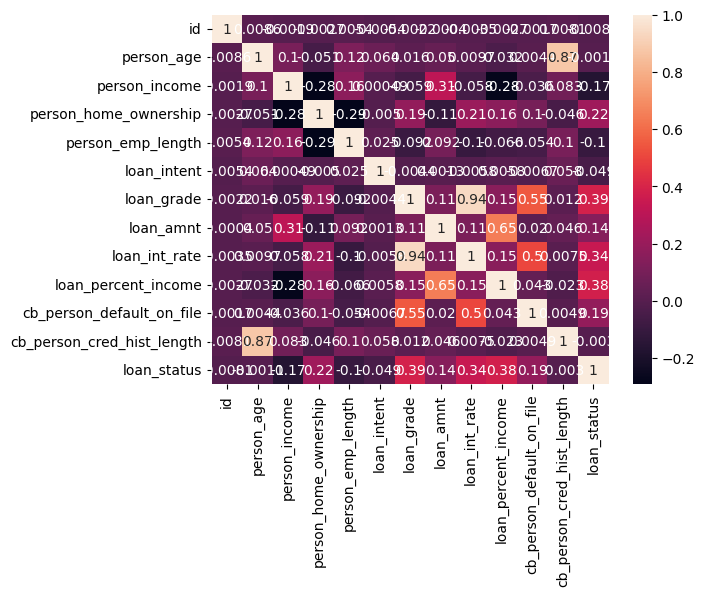

In [123]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

From the above we understand that we need to look at the columns: loan_grade, loan_percent_income, loan_int_rate

- loan_grade and loan_int_rate have 0.94 correlation. This could cause multicollinearity. But loan_grade and loan_int_rate are highly connected with loan_status. We will create a interaction term

In [197]:
#data.drop('loan_int_rate', axis=1, inplace=True)

In [47]:
#data.drop('loan_intent', axis=1, inplace=True)

We also understand that we can remove columns: id, person_age and cb_person_cred_hist_length

Removing the less correlated columns

In [284]:
data.drop(['id'], axis=1, inplace=True)

In [285]:
data['new_feat']=data['loan_grade']*data['loan_int_rate']
#data.drop(['loan_grade', 'loan_int_rate'], axis=1, inplace=True)'''

<Axes: >

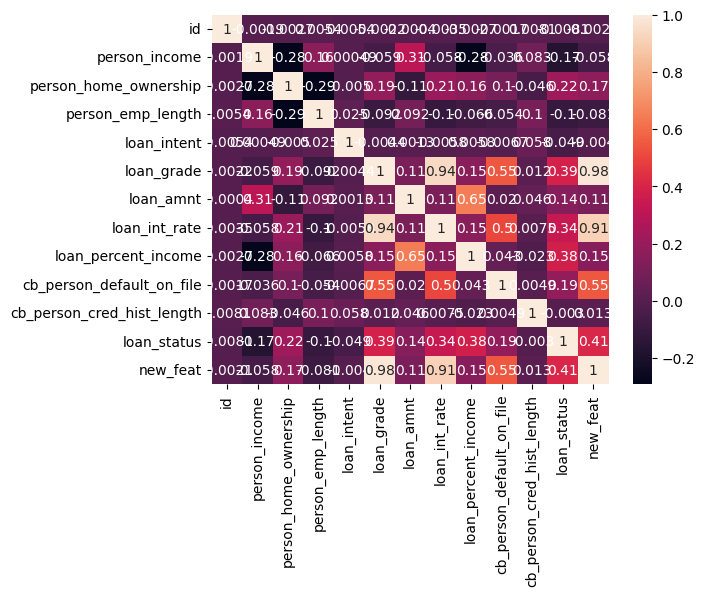

In [280]:
sns.heatmap(data.corr(), annot=True)

Normalization

In [286]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print(data_normalized.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0    0.165049       0.016246               1.000000           0.000000   
1    0.019417       0.027324               0.666667           0.048780   
2    0.087379       0.012976               0.666667           0.065041   
3    0.097087       0.034708               1.000000           0.113821   
4    0.019417       0.029433               1.000000           0.016260   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0          0.2    0.166667   0.159420       0.341011             0.204819   
1          0.6    0.333333   0.101449       0.445506             0.084337   
2          0.8    0.000000   0.159420       0.195506             0.253012   
3          1.0    0.166667   0.333333       0.319663             0.204819   
4          0.6    0.000000   0.159420       0.084270             0.120482   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  \
0                  

Training a random forest model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a target variable column named 'loan_status'
X = data_normalized.drop('loan_status', axis=1)  # Replace 'target' with your target variable column name
y = data_normalized['loan_status']  # Replace 'target' with your target variable column name

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

XG Boost Classifier

In [38]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Logistic Regression

In [6]:
X = data_normalized.drop('loan_status', axis=1)  # Replace 'target' with your target variable column name
y = data_normalized['loan_status']  # Replace 'target' with your target variable column name

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X, y)


LogisticRegression(max_iter=1000, random_state=42)

XG BOOST + TREATING IMBALANCE CLASS PROBLEM (Using Class Weights in Models)

In [252]:
X = data_normalized.drop('loan_status', axis=1)
y = data_normalized['loan_status']
from xgboost import XGBClassifier
clf = XGBClassifier(scale_pos_weight=ratio_of_majority_to_minority_class)
clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Importing the test data

In [253]:
test_data=pd.read_csv('/content/test.csv')
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


Preprocessing and normalizing

In [254]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns and apply label encoding to object type columns
for column in test_data.columns:
  if test_data[column].dtype == object:
    test_data[column] = le.fit_transform(test_data[column])


In [255]:

# Removing columns because of multicollinearity problem and less correlation
id=test_data['id']
test_data.drop(['id', 'person_age', 'cb_person_cred_hist_length'], axis=1, inplace=True)


In [256]:

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
test_data_normalized = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)

print(test_data_normalized.head())

   person_income  person_home_ownership  person_emp_length  loan_intent  \
0       0.034283                    1.0           0.071429          0.4   
1       0.048523                    0.0           0.142857          0.8   
2       0.013713                    1.0           0.119048          1.0   
3       0.024262                    1.0           0.095238          0.0   
4       0.051688                    0.0           0.190476          0.4   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0    0.833333   0.708455       0.619533             0.493151   
1    0.333333   0.271137       0.434991             0.136986   
2    0.666667   0.096210       0.705213             0.178082   
3    0.000000   0.183673       0.208508             0.191781   
4    0.500000   0.416910       0.653086             0.205479   

   cb_person_default_on_file  
0                        0.0  
1                        1.0  
2                        1.0  
3                        0.0  
4        

TESTING THE MODEL ON RANDOM FOREST MODEL

In [14]:
# Make predictions on the test set
y_pred = rf_model.predict(test_data_normalized)

In [15]:
# prompt: i need to download a csv file with 'id' and 'loan_status' from the y_pred

import pandas as pd

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_random_forest.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_random_forest.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING ON THE XGB BOOST

In [42]:
# Make predictions on the test set
y_pred = xgb_model.predict(test_data_normalized)

In [43]:
# prompt: i need to download a csv file with 'id' and 'loan_status' from the y_pred

import pandas as pd

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_xgb_imbalance.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_xgb_imbalance.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING ON A LOGISTIC REGRESSION MODEL

In [9]:
# Make predictions on the test set
y_pred = lr_model.predict(test_data_normalized)

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_logistic.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_logistic.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING ON XGBOOST WITH IMBALANCE CLASS TREATMENT

In [258]:
# Make predictions on the test set
y_pred = clf.predict(test_data_normalized)

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': id, 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_xgb_remove_cols.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_xgb_remove_cols.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Compare logistic and xgboost

In [11]:
xgboost=pd.read_csv('/content/submission_xgboost.csv')
logistic=pd.read_csv('/content/submission_logistic.csv')

In [12]:
# prompt: check accuracy of logistic wrt xgboost of the column 'loan_status'

accuracy = (xgboost['loan_status'] == logistic['loan_status']).mean()
print(f"Accuracy of logistic regression compared to XGBoost: {accuracy}")


Accuracy of logistic regression compared to XGBoost: 0.9078981022047163


Compare logistic and random forest

In [13]:
rf=pd.read_csv('/content/submission_random_forest.csv')
accuracy2 = (rf['loan_status'] == logistic['loan_status']).mean()
print(f"Accuracy of logistic regression compared to RF: {accuracy2}")

Accuracy of logistic regression compared to RF: 0.9203028287891963


I think logistic accuracy could be bad, will check it out later in the kaggle platform



Compare xgboost and xgboost after outlier removal

In [45]:
xgb_outlier=pd.read_csv('/content/submission_xgboost_outlier.csv')
accuracy3 = (xgb_outlier['loan_status'] == xgboost['loan_status']).mean()
print(accuracy3)

1.0


No point in outlier removal. XGBoost is quite robust to outliers compared to other models

Compare NN and xgboost_imbalance

In [104]:
xgboost_imb=pd.read_csv('/content/submission_xgb_imbalance.csv')
nn=pd.read_csv('/content/submission_nn.csv')
accuracy4 = (nn['loan_status'] == xgboost_imb['loan_status']).mean()
print(accuracy4)

0.9118369226047368


Compare xgboost with eda and xg boost with only imbalance solving

In [20]:
xgboost_imb=pd.read_csv('/content/submission_xgb_imbalance.csv')
xgboost_eda=pd.read_csv('/content/submission_xgb_eda.csv')
accuracy4 = (xgboost_eda['loan_status'] == xgboost_imb['loan_status']).mean()
print(accuracy4)

0.9435520998516548


MODELS WITH TEST AND TRAIN SPLIT TO CHECK ACCURACY

XG BOOST WITH IMBALANCE

In [287]:
X = data_normalized.drop('loan_status', axis=1)
y = data_normalized['loan_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
clf = XGBClassifier(scale_pos_weight=ratio_of_majority_to_minority_class)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

only adding feat and not removing cols

In [273]:
# prompt: give accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9349475658623924


removing cols

In [261]:
# prompt: give accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9260806547872794


In [251]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")


ROC-AUC score: 0.9540741287703194


Only feat 2 removing feat 1 and loan_percent_income

In [189]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")


ROC-AUC score: 0.952656710009036


NO EDA

In [266]:
# prompt: give accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9349475658623924


In [245]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")

ROC-AUC score: 0.9519698718590407


Feature 1,2 and LTV

In [131]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")

ROC-AUC score: 0.953328846586464


Only LTV

In [118]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")


ROC-AUC score: 0.9533019188601192


Score with feature 2 + loan-to-value column

In [152]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")


ROC-AUC score: 0.9551888823025306


Score with feature2 alone

In [96]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")


ROC-AUC score: 0.9535048730128273


feat 2 and ltv. removed feat1, loan_percent_income

In [165]:
# prompt: give code to check roc-auc accuracy with x_test and y_test

from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC score: {roc_auc}")


ROC-AUC score: 0.9528315591020726
